# Exercícios últimas aulas

$$ $$

In [151]:
from numpy.linalg import inv, eig
from numpy.linalg import matrix_rank as rank
from numpy import array, eye, dot, zeros, poly, ones
from numpy import roots, arange, asarray, concatenate
from functools import reduce
import matplotlib.pyplot as plt
from control import acker, place, ss, forced_response, lqr
from control import obsv, ctrb, minreal, tf, ss2tf, tf2ss
from IPython.display import Image

def mul_mat(*args):
    return reduce(dot, args)

def plota_resp(T,
               yout,
               titulo,
               xlabel='Tempos (s)',
               ylabel='Altura da bolinha (m)\n'):

    plt.plot(T, yout)
    plt.title(titulo + '\n')
    plt.xlabel('\n' + xlabel)
    plt.ylabel(ylabel + '\n')
    plt.grid(alpha=.5)
    plt.show()
    
def plota_resp2(T,
               yout,
               titulo,
               legend_lab=['var1', 'var2'],
               xlabel='Tempos (s)',
               ylabel='Altura da bolinha (m)\n',
               xlim=None):

    plt.plot(T, yout[0], 'b--', label=legend_lab[0])
    plt.plot(T, yout[1], 'r', label=legend_lab[1])
    if xlim:
        plt.xlim(xlim)
        
    plt.title(titulo + '\n')
    plt.xlabel('\n' + xlabel)
    plt.ylabel(ylabel + '\n')
    plt.grid(alpha=.5)
    plt.legend()
    plt.show()    
    
def plota_resp_sist(t, yout):
    
    plt.rcParams["figure.figsize"] = (11,7)
    
    fig, axes = plt.subplots(4, 1)
    ylabels = ["x1", "x1'", "x2", "x2'"]

    for num, ax in enumerate(axes.flatten()):
        ax.axhline(y=0, color='black')
        ax.plot(T, yout[num], color='b')
        ax.set_ylabel(ylabels[num])
        ax.grid()

    fig.tight_layout()
    plt.show()    
    
# plots config    
plt.rcParams["figure.figsize"] = (11,7)
plt.rcParams.update({'font.size': 15})


$$ $$

## Pêndulo invertido (método espaço de estados)

$$ $$

In [17]:
# Modelo de planta utilizado
A = array([[0,      1,       0, 0],
           [0, -.1818,  2.6727, 0],
           [0,      0,       0, 1],
           [0, -.4545, 31.1818, 0]])

B = array([[0, 1.8182, 0, 4.5455]]).T

C = array([[1, 0, 0, 0],
           [0, 0, 1, 0]])

# C2 = array([1, 0, 0, 0],
#            [0, 0, 1, 0])

D = array([[0, 0]]).T

out = ss2tf(A,B,C,D)

sys = ss(A,B,C,D)

In [18]:
out

TransferFunction([[array([ 1.81820000e+00, -3.15703019e-15, -4.45459909e+01])], [array([ 4.54550000e+00, -2.62012634e-14,  0.00000000e+00])]], [[array([ 1.00000000e+00,  1.81800000e-01, -3.11818000e+01, -4.45410909e+00,
       -4.53901554e-14])], [array([  1.        ,   0.1818    , -31.1818    ,  -4.45410909,
         0.        ])]])

In [19]:
print('''M = 0.5;
m = 0.2;
b = 0.1;
I = 0.006;
g = 9.8;
l = 0.3;

p = I*(M+m)+M*m*l^2; %denominator for the A and B matrices

A = [0      1              0           0;
     0 -(I+m*l^2)*b/p  (m^2*g*l^2)/p   0;
     0      0              0           1;
     0 -(m*l*b)/p       m*g*l*(M+m)/p  0];
B = [     0;
     (I+m*l^2)/p;
          0;
        m*l/p];
C = [1 0 0 0;
     0 0 1 0];
D = [0;
     0];

states = {'x' 'x_dot' 'phi' 'phi_dot'};
inputs = {'u'};
outputs = {'x'; 'phi'};

sys_ss = ss(A,B,C,D,'statename',states,'inputname',inputs,'outputname',outputs);

poles = eig(A)'''.replace(";", ""))

M = 0.5
m = 0.2
b = 0.1
I = 0.006
g = 9.8
l = 0.3

p = I*(M+m)+M*m*l^2 %denominator for the A and B matrices

A = [0      1              0           0
     0 -(I+m*l^2)*b/p  (m^2*g*l^2)/p   0
     0      0              0           1
     0 -(m*l*b)/p       m*g*l*(M+m)/p  0]
B = [     0
     (I+m*l^2)/p
          0
        m*l/p]
C = [1 0 0 0
     0 0 1 0]
D = [0
     0]

states = {'x' 'x_dot' 'phi' 'phi_dot'}
inputs = {'u'}
outputs = {'x' 'phi'}

sys_ss = ss(A,B,C,D,'statename',states,'inputname',inputs,'outputname',outputs)

poles = eig(A)


In [86]:
M = 0.5
m = 0.2
b = 0.1
I = 0.006
g = 9.8
l = 0.3

p = I*(M+m)+M*m*l**2  # denominator for the A and B matrices

b22 = -(I+m*l**2)*b/p
b42 = -(m*l*b)/p
b43 = m*g*l*(M+m)/p

A = array([[0,               1,               0,  0],
           [0, -(I+m*l**2)*b/p, (m**2*g*l**2)/p,  0],
           [0,               0,               0,  1],
           [0,      -(m*l*b)/p,   m*g*l*(M+m)/p,  0]])

B = array([[0, (I+m*l**2)/p, 0, m*l/p]]).T

C = array([[1, 0, 0, 0,],
            [0, 0, 1, 0]])

D = array([[0, 0]]).T

states = {'x' 'x_dot' 'phi' 'phi_dot'}
inputs = {'u'}
outputs = {'x' 'phi'}

# sys_ss = ss(A,B,C,D,'statename',states,'inputname',inputs,'outputname',outputs)
sys_ss = ss(A,B,C,D)

poles = eig(A)


In [87]:
poles

(array([ 0.        , -0.14283164, -5.60409413,  5.56510758]),
 array([[ 1.00000000e+00, -9.89950880e-01, -1.53915480e-02,
          1.47285525e-02],
        [ 0.00000000e+00,  1.41396303e-01,  8.62556837e-02,
          8.19659793e-02],
        [ 0.00000000e+00,  2.06252002e-03, -1.74990589e-01,
          1.76244095e-01],
        [ 0.00000000e+00, -2.94593108e-04,  9.80663730e-01,
          9.80817346e-01]]))

In [88]:
rank(ctrb(A, B))

4

In [89]:
Q = dot(C.T, C)

Q

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [90]:
R = 1
K, S, E  = lqr(A, B, Q, R)

In [91]:
K

matrix([[-1.        , -1.65671003, 18.6853959 ,  3.45943818]])

In [119]:
B

array([[0.        ],
       [1.81818182],
       [0.        ],
       [4.54545455]])

In [120]:

Ac = A-dot(B,K)
Bc = B
Cc = C
Dc = D

Ac

matrix([[  0.        ,   1.        ,   0.        ,   0.        ],
        [  1.81818182,   2.83038186, -31.30071982,  -6.28988759],
        [  0.        ,   0.        ,   0.        ,   1.        ],
        [  4.54545455,   7.07595466, -53.75179955, -15.72471898]])

In [145]:

t = arange(0, 5, .01)
sys_ss = ss(Ac,Bc,Cc,Dc)
T, yout, xout = forced_response(sys_ss, t, U=0.2)


In [123]:
yout.shape, xout.shape

((2, 500), (4, 500))

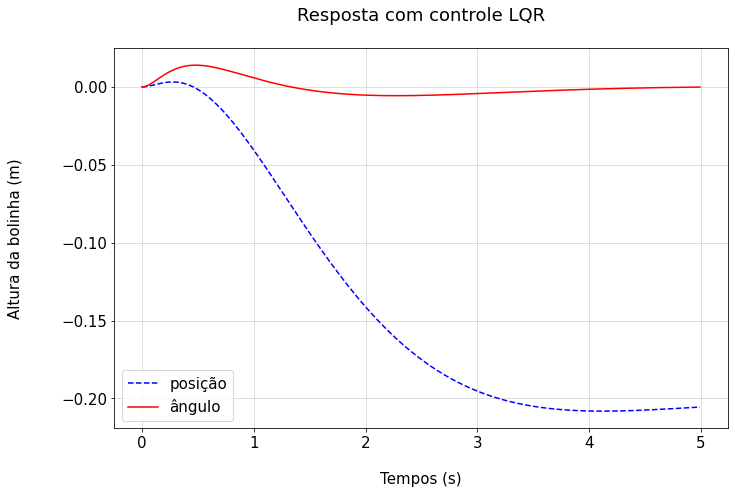

In [155]:
plota_resp2(T=T,
            yout=yout,
            titulo='Resposta com controle LQR',
               legend_lab=['posição', 'ângulo'])

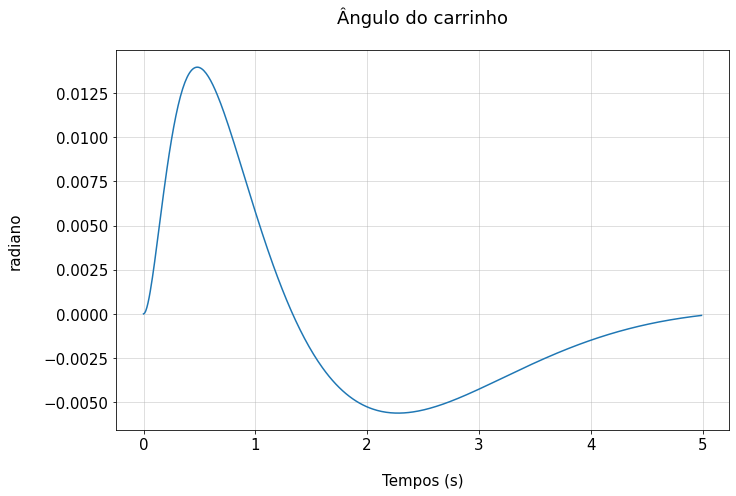

In [160]:
plota_resp(T, yout[1], 'Ângulo do carrinho', ylabel='radiano')

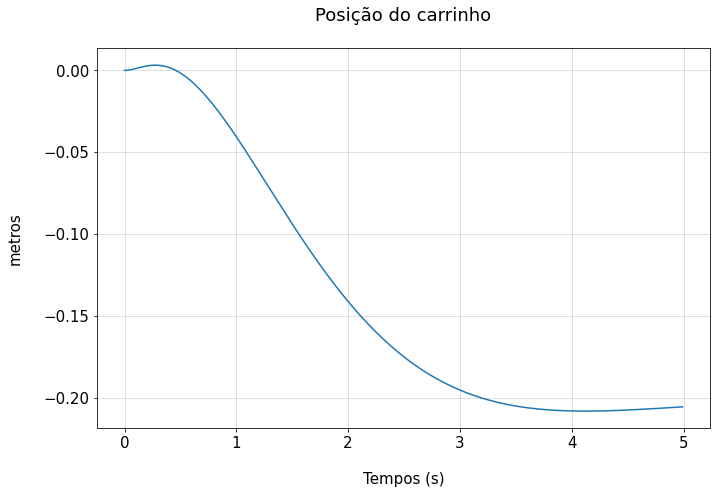

In [159]:
plota_resp(T, yout[0], 'Posição do carrinho', ylabel='metros')

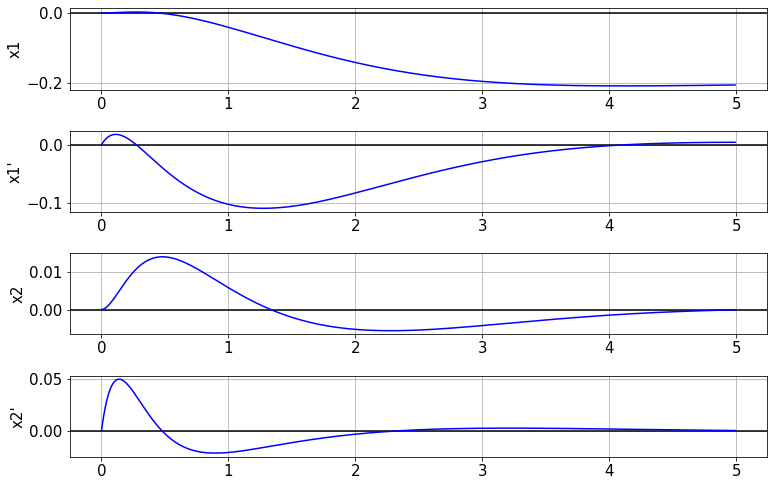

In [156]:
plota_resp_sist(T, xout)

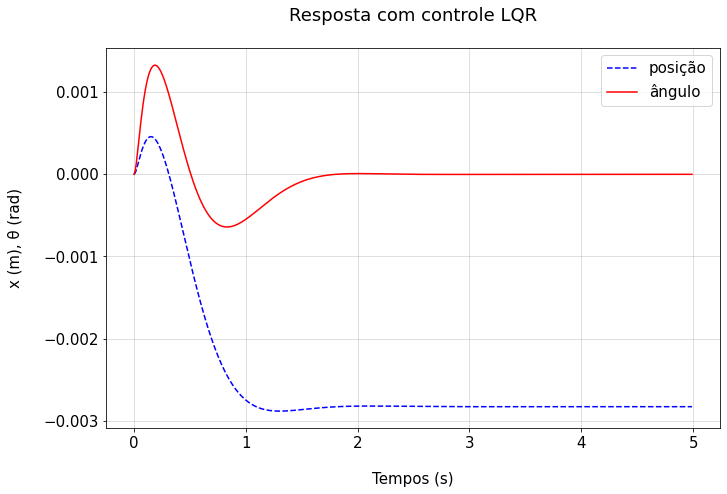

In [166]:
Q = dot(C.T, C)

Q

Q[0,0] = 5000

Q[3,3] = 100

R = 1
K, S, E  = lqr(A, B, Q, R)

Ac = A-dot(B,K)
Bc = B
Cc = C
Dc = D

t = arange(0, 5, .01)
sys_ss = ss(Ac,Bc,Cc,Dc)
T, yout, xout = forced_response(sys_ss, t, U=0.2)

plota_resp2(T=T,
            yout=yout,
            titulo='Resposta com controle LQR',
            legend_lab=['posição', 'ângulo'],
            ylabel='x (m), θ (rad)')

$$ $$

In [173]:
AA.shape

(6, 5)

In [175]:
A

array([[ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        , -0.18181818,  2.67272727,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        , -0.45454545, 31.18181818,  0.        ]])

In [176]:
B

array([[0.        ],
       [1.81818182],
       [0.        ],
       [4.54545455]])

In [177]:
C

array([[1, 0, 0, 0],
       [0, 0, 1, 0]])

In [184]:
D2

array([0])

In [193]:
Cn.shape, D2.shape

((1, 4), (1, 1))

In [199]:
D2 = array([[0]])

Cn = array([[1, 0, 0, 0]])

a1_ = concatenate((A,   B), axis=1)
a2_ = concatenate((Cn,  D2), axis=1)

AA = concatenate((a1_, a2_), axis=0)

# set point é 2
rss = 0.2
t = array([[0, 0, 0, 0, rss]]).T

t

# xss -> 2x1
# uss -> 1x1
# t = [[xss], [uss]]
aux = dot(inv(AA),t)


xss = aux[0:4]

# valor de controle
uss = aux[4,:]

Nx = xss/rss
Nu = uss/rss
Nbar = Nu + dot(K,Nx)

Nbar = float(Nbar)

Nbar

-70.71067812875685

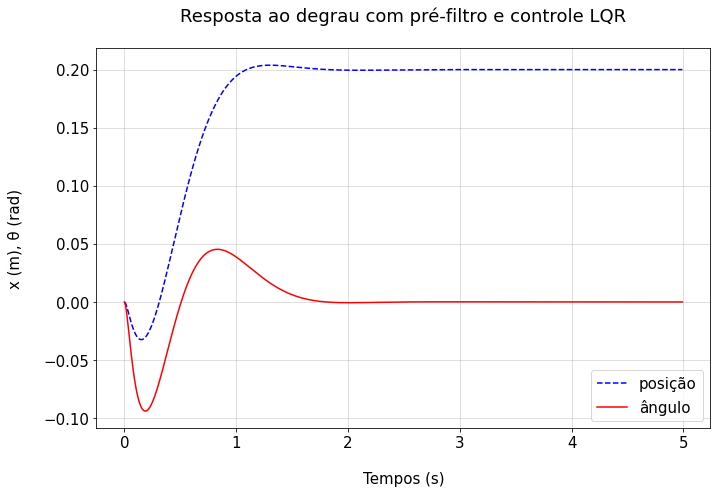

In [204]:
t = arange(0, 5, .01)
sys_ss = ss(Ac,Bc*Nbar,Cc,Dc)
T, yout, xout = forced_response(sys_ss, t, U=0.2)

plota_resp2(T=T,
            yout=yout,
            titulo='Resposta ao degrau com pré-filtro e controle LQR',
            legend_lab=['posição', 'ângulo'],
            ylabel='x (m), θ (rad)')

$$ $$
# Observador
$$ $$

In [206]:
rank(obsv(A,C))

4

In [208]:
D,V = eig(Ac)

D.round()

array([-46.+0.j,  -3.+3.j,  -3.-3.j,  -3.+0.j])

$$ $$
Os valores acima **NÃO BATERAM!!**
$$ $$

In [209]:
D,V = eig(A)

D.round()

array([ 0., -0., -6.,  6.])

In [211]:

P = [-40, -41, -42, -43];
L = place(A.T, C.T, P).T


In [219]:
L2 = array(L).T

In [222]:
L

matrix([[8.28764473e+01, 9.94417569e-01],
        [1.70884952e+03, 4.37601801e+01],
        [5.47654388e-01, 8.29417345e+01],
        [3.92026165e+00, 1.74981185e+03]])

In [217]:
C

array([[1, 0, 0, 0],
       [0, 0, 1, 0]])

In [220]:
L2

array([[8.28764473e+01, 1.70884952e+03, 5.47654388e-01, 3.92026165e+00],
       [9.94417569e-01, 4.37601801e+01, 8.29417345e+01, 1.74981185e+03]])

In [225]:



# construindo At
a11 = A - dot(B,K)
a12 = dot(B,K)
a21 = zeros(A.shape)
a22 = A - dot(L,C)

a1_ = concatenate((a11, a12), axis=1)
a2_ = concatenate((a21, a22), axis=1)

Ace = concatenate((a1_, a2_), axis=0)

# construindo Bt
b11 = B*Nbar
b21 = zeros(B.shape)

Bce = concatenate((b11, b21), axis=0)

# construindo Ct
c11 = C
c12 = zeros(C.shape)

Cce = concatenate((c11, c12), axis=1)


In [226]:
D

array([ 0.        , -0.14283164, -5.60409413,  5.56510758])

In [239]:
Dce = array([[0,0]]).T

In [240]:
Dce

array([[0],
       [0]])

In [241]:
Bce

array([[  -0.        ],
       [-128.56486933],
       [  -0.        ],
       [-321.41217331],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ]])

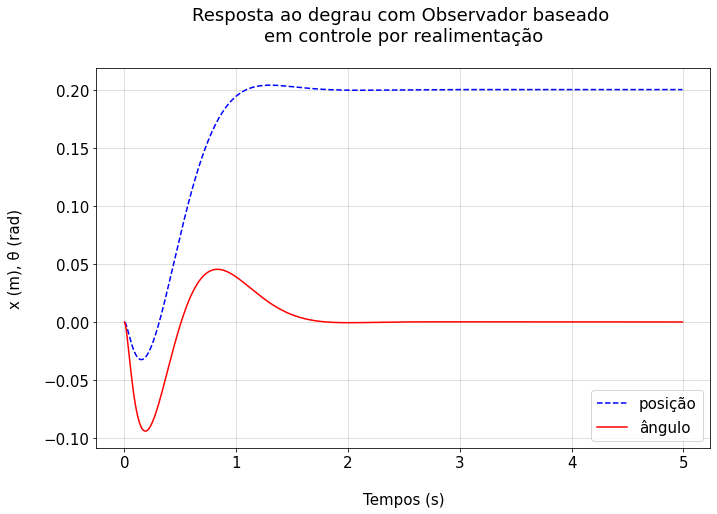

In [246]:
t = arange(0, 5, .01)
sys_ss = ss(Ace,Bce,Cce,Dce)
T, yout, xout = forced_response(sys_ss, t, U=0.2)

plota_resp2(T=T,
            yout=yout,
            titulo='Resposta ao degrau com Observador baseado \nem controle por realimentação',
            legend_lab=['posição', 'ângulo'],
            ylabel='x (m), θ (rad)')

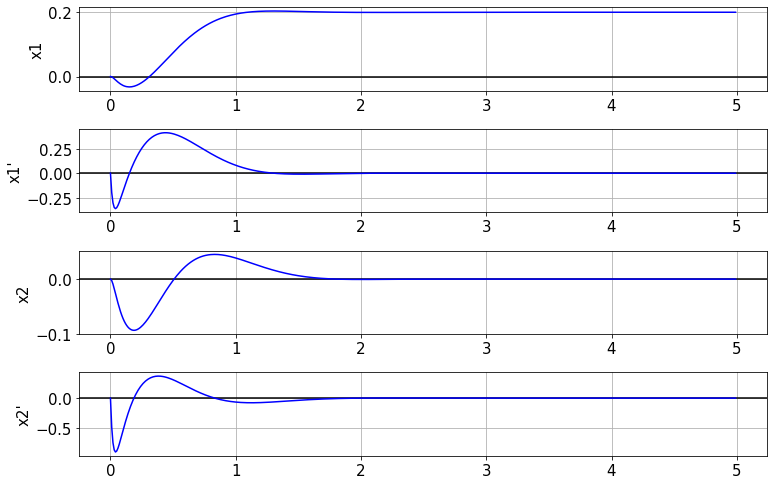

In [247]:
plota_resp_sist(T, xout)